First, import modules

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot
import random
import math
import time
from IPython.display import clear_output

Define the state. 0 is cooperate, 1 is defect. The state is therefore (in binary) 00 for CC, 01 for CD, 10 for DC and 11 for DD

In [3]:
def advance(action1, action2):
  newstate = 2*action1 + action2
  return newstate



Secondly, set up the rewards matrix. This is set up so reward[state][playernumber] returns the reward for that player

In [4]:
rewards = [[3, 3],[0, 5],[5, 0],[1, 1],[0,0]]


Next we define parameters for the epsilon greedy function

In [5]:
#Learning rate
alpha1 = 0.01
alpha2 = 0.01

#Discount factor. 0 means future rewards not considered
gamma1 = 0.9
gamma2 = 0.9

#Exploration rate. Higher means more random exploration
epsilon1 = 0.01
epsilon2 = 0.01

Next, we create the epsilon greedy function. This takes the Q values and state, and returns an action. 

If a random value between 0 and 1 is bigger then epsilon, then choose the biggest Q, else choose a random action

In [6]:
def epsilongreedy(Q, state, e):
  randval = random.random()
  Qvals_for_state = Q[state,:]

  if randval > e:
    action = np.argmax(Qvals_for_state)

  else:
    action = random.randrange(Qvals_for_state.size)

  return action


In [7]:
def stochastic_choose(Q, state, t):
  Qvals_for_state = Q[state,:].copy()
  randval = random.random()

  boundary = np.exp(Qvals_for_state[0]/t)/np.exp((Qvals_for_state[0]/t)+np.exp(Qvals_for_state[1]/t))

  if randval < boundary:
    return 0

  else:
    return 1

In [8]:
def transformstate(state):
  if state == 1:
    transformedstate = 2
  elif state == 2:
    transformedstate = 1
  else: transformedstate = state
  return transformedstate

def transformQ(Q):
  transformedQ = Q.copy()
  transformedQ[2] = Q[1].copy()
  transformedQ[1] = Q[2].copy()
  return transformedQ

In [9]:
TFT1 = np.array([[30.99999, 0], [0, 30.9999], [30.9999, 0], [0, 30.9999], [30.9999, 0]])
TFT2 = np.array([[30.99999, 0], [30.9999, 0], [0, 30.9999], [0, 30.9999], [30.9999, 0]])

In [10]:
def TFT_check(Q):
  if Q[0][0] > Q[0][1] and Q[1][0] < Q[1][1] and Q[2][0] > Q[2][1] and Q[3][0] < Q[3][1] and Q[4][0] > Q[4][1]:
    return 1
  else:
    return 0

def Co_op_check(Q):
  if Q[0][0] > Q[0][1] and Q[2][0] > Q[2][1] and Q[4][0] > Q[4][1]:
    return 1
  else:
    return 0

In [11]:
print(TFT_check(TFT1))

1


next we do Q learning

In [12]:
def Qlearning(rewards, num_episodes, num_steps, alpha1, alpha2, gamma1, gamma2, epsilon1, epsilon2, debug = False, Q_Player_A_preset = TFT1, Q_Player_B_preset = TFT2):
  Q_Player_A = np.zeros((5, 2))
  Q_Player_B = np.zeros((5, 2))
  episode_rewards_A = []
  episode_rewards_B = []
  TFT_A = []
  TFT_B = []
  CoOp_A = []
  CoOp_B = []
  Q_A_array = np.zeros((num_episodes, 5, 2))
  if debug == True:
    print("Qa is:")
    print(Q_Player_A)

    aaaa = input("press enter to continue")

  for episode in range(num_episodes):
    episode_reward_A = 0
    episode_reward_B = 0
    state = 4 #set default initial state
    for step in range(num_steps):
      
      actionA = epsilongreedy(Q_Player_A, state, epsilon1)
      actionB = epsilongreedy(Q_Player_B, state, epsilon2)
      next_state = advance(actionA, actionB)

      reward_A = rewards[next_state][0]
      episode_reward_A += reward_A

      reward_B = rewards[next_state][1]
      episode_reward_B += reward_B
      
      #update Q for A
      best_next_actionA = np.argmax(Q_Player_A[next_state,:])

      td_targetA = reward_A + gamma1 * Q_Player_A[next_state, best_next_actionA]

      td_deltaA = td_targetA - Q_Player_A[state][actionA]

      if debug == True:
        aaaa = input("press enter to continue")
        clear_output(wait=True)
        print("Best next action for A")
        print(best_next_actionA)

        print("Td Target A:")
        print(td_targetA)

        print("td delta A:")
        print(td_deltaA)
      # Update Q for B

      best_next_actionB = np.argmax(Q_Player_B[next_state,:])

      td_targetB = reward_B + gamma2 * Q_Player_B[next_state, best_next_actionB]


      td_deltaB = td_targetB - Q_Player_B[state][actionB]


      
      if debug == True:
        
        print("Current state:")
        print(state)
        print("Player A")
        print(actionA)
        print("Player B")
        print(actionB)

        print("A is rewarded:")
        print(reward_A)
        print("B is rewarded:")
        print(reward_B)

        print("Next state:")
        print(next_state)

        print("Qa is:")
        print(Q_Player_A)

        
      Q_Player_A[state][actionA] = Q_Player_A[state][actionA] + alpha1 * td_deltaA
      Q_Player_B[state][actionB] += alpha2 * td_deltaB
      
      if debug == True:
        print("Alpha1 is")
        print(alpha1)
        print("alpha1*td_deltaA is")
        print(alpha1 * td_deltaA)
        print("Updated Q for state and Action:")
        print(Q_Player_A[state][actionA])
        
      state = next_state
    episode_rewards_A.append(episode_reward_A)
    episode_rewards_B.append(episode_reward_B)
    TFT_A.append(TFT_check(Q_Player_A))
    TFT_B.append(TFT_check(transformQ(Q_Player_B)))
    CoOp_A.append(Co_op_check(Q_Player_A))
    CoOp_B.append(Co_op_check(transformQ(Q_Player_B)))
    Q_A_array[episode,:,:]=Q_Player_A
  return Q_Player_A, Q_Player_B, episode_rewards_A, episode_rewards_B, TFT_A, TFT_B, CoOp_A, CoOp_B, Q_A_array

[[29.69515132 29.3392847 ]
 [29.43601397  0.82788178]
 [29.43021261  0.49473253]
 [ 1.15866862  0.        ]
 [29.78943051 11.54464039]]
[[29.88419577 29.69591715]
 [29.45810304  0.24203597]
 [29.39439292  0.27903476]
 [ 1.16989901  0.        ]
 [29.86442864  9.70322035]]


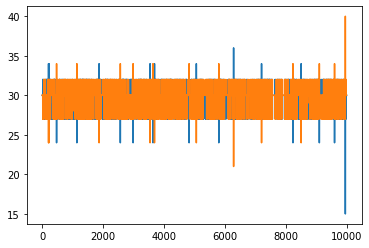

In [23]:
Q_A, Q_B, episode_rewards_A, episode_rewards_B, TFT_A, TFT_B, CoOp_A, CoOp_B, Q_A_Array = Qlearning(rewards, 10000, 10, alpha1, alpha2, gamma1, gamma2, epsilon1,  epsilon2, False)     #Set the bool to false to run Q learning, true to see what it does at every step. Input Q as the last input to keep learned variables and remove it to learn from scratch
#Q_A, Q_B, episode_rewards_A, episode_rewards_B = Qlearning(rewards, 10000, 10, alpha1, alpha2, gamma1, gamma2, epsilon1,  epsilon2, True)
#Q_A, Q_B, episode_rewards_A, episode_rewards_B = Qlearning(rewards, 10000, 10, alpha1, alpha2, gamma1, gamma2, epsilon1,  epsilon2, False, np.zeros((5, 2)), np.zeros((5, 2)))

print(Q_A)
print(Q_B)

matplotlib.pyplot.plot(episode_rewards_A)
matplotlib.pyplot.plot(episode_rewards_B)

Text(0, 0.5, 'Will Q choose TFT ignoring randomness?')

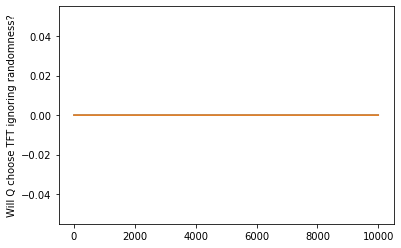

In [24]:
matplotlib.pyplot.plot(TFT_A)
matplotlib.pyplot.plot(TFT_B)
matplotlib.pyplot.ylabel("Will Q choose TFT ignoring randomness?")

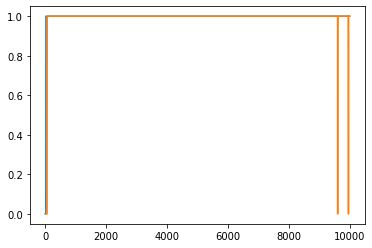

In [25]:
matplotlib.pyplot.plot(CoOp_A)
matplotlib.pyplot.plot(CoOp_B)

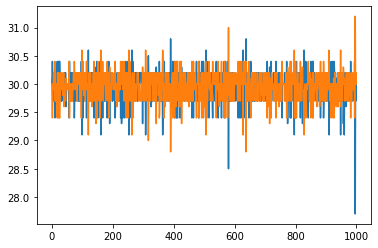

In [26]:
rewards_averaged_A = []
counter = 0
for count in range(len(episode_rewards_A)):
  counter += episode_rewards_A[count]
  if count % 10 == 9:
    rewards_averaged_A.append(counter/10)
    counter = 0

rewards_averaged_B = []
counter = 0
for count in range(len(episode_rewards_B)):
  counter += episode_rewards_B[count]
  if count % 10 == 9:
    rewards_averaged_B.append(counter/10)
    counter = 0
matplotlib.pyplot.plot(rewards_averaged_A)
matplotlib.pyplot.plot(rewards_averaged_B)

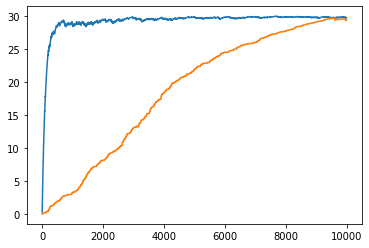

In [27]:
#CC

matplotlib.pyplot.plot(Q_A_Array[:,0,0])
matplotlib.pyplot.plot(Q_A_Array[:,0,1])

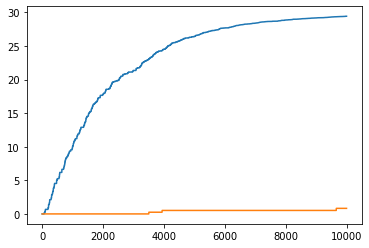

In [28]:
#CD

matplotlib.pyplot.plot(Q_A_Array[:,1,0])
matplotlib.pyplot.plot(Q_A_Array[:,1,1])

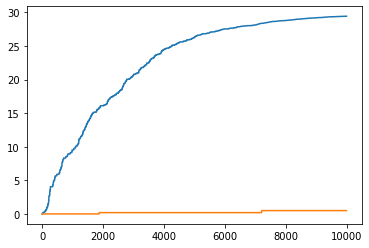

In [29]:
#DC

matplotlib.pyplot.plot(Q_A_Array[:,2,0])
matplotlib.pyplot.plot(Q_A_Array[:,2,1])

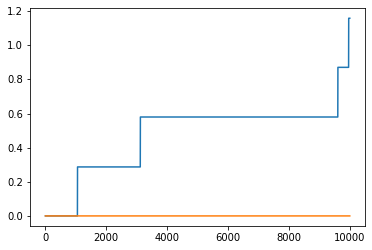

In [30]:
#DD

matplotlib.pyplot.plot(Q_A_Array[:,3,0])
matplotlib.pyplot.plot(Q_A_Array[:,3,1])

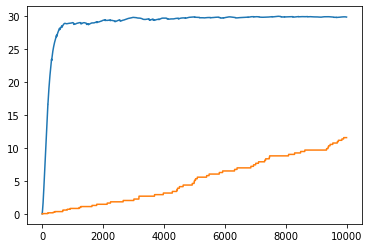

In [31]:
#Initial

matplotlib.pyplot.plot(Q_A_Array[:,4,0])
matplotlib.pyplot.plot(Q_A_Array[:,4,1])

In [ ]:
print(TFT1)

[[30.99999  0.     ]
 [ 0.      30.9999 ]
 [30.9999   0.     ]
 [ 0.      30.9999 ]
 [30.9999   0.     ]]
